My code add the white pixel of the logo ULB (watermark.png) somewhere in an image (zebra.jpg). I have also add a transparency effect on the watermark. Then the new image with the watermark is displayed in the notebook and finally saved.

The first function bellow shade the image on which we want to add the watermark, so we have the same image as before but more black. I will than use this shaded pixels to replace the white ones of the ULB logo.

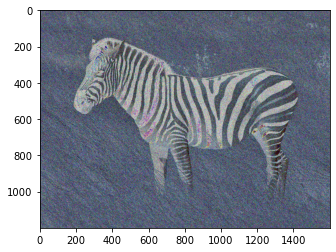

In [1]:
from skimage.io import imread,imsave,imshow
from matplotlib import pyplot as plt
import numpy as np

def shading(img, percent):
    """
    img : image that will be shaded
    percent : a value between 0 (no change)
             and 1 (image will be black)
    """
    im = imread(img) #ouvre l'image sur laquelle on veut rajouter un logo

    shaded_img = im * (1 - percent) #on rend l'image plus noire 
    return shaded_img

im_shaded = shading('zebra.jpg', 0.5)
plt.imshow((im_shaded*255).astype(np.uint8))
plt.show()


Now that we have this shaded image, I have made a function "logo" that scan the entire watermark image and when a pixel of the watermark is white, I add this pixel on the zabra image. To do so I replace the value of the pixel with the value of the correspond one on the shaded image. 
Then I display it in the notebook and I save the image in a file called "newimage.jpg".

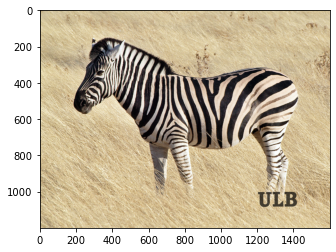

In [2]:

#code final

from skimage.io import imread,imsave,imshow
from matplotlib import pyplot as plt
import numpy as np


def shading(img, percent):
    """
    img : image that will be shaded
    percent : a value between 0 (no change)
             and 1 (image will be black)
    """
    im = imread(img) #open the image on which we want to add the logo

    shaded_img = im * (1 - percent) #the image is shaded 
    return shaded_img


def logo(img, watermark, saveimage):
    """
    img : image on which we add a watermark
    watermark : logo that we want to add on the image
    saveimage : image that will be saved after the modification
    """
    im = imread(img) #open the image on which we want to add the logo
    water_mark = imread(watermark) #open the watermark image
    im_shaded = shading(img, 0.7) #shade the image  
    
    for y in range(water_mark.shape[0]): #scan the logo image
        for x in range(water_mark.shape[1]):
            if water_mark[y,x] == 255: 
                im[1000+y,1200+x] = im_shaded[1000+y,1200+x] #replace the white pixels by the shaded image pixels to have transparency effect

    plt.imshow(im) #display the image in the notebook
    imsave(saveimage, im) #save the ne image

logo('zebra.jpg', 'watermark.png', 'newimage.jpg')

